In [13]:

from pyspark.sql import SparkSession

# @hidden_cell
# This function is used to setup the access of Spark to your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def set_hadoop_config_with_credentials_d3bd5b94a9334de59a55a7fed2bedeaa(name):
    """This function sets the Hadoop configuration so it is possible to
    access data from Bluemix Object Storage using Spark"""

    prefix = 'fs.swift.service.' + name
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + '.auth.url', 'https://identity.open.softlayer.com'+'/v3/auth/tokens')
    hconf.set(prefix + '.auth.endpoint.prefix', 'endpoints')
    hconf.set(prefix + '.tenant', '6aaf54352357483486ee2d4981f8ef15')
    hconf.set(prefix + '.username', '9033afb2dbf04d06948d8a4947fd7b27')
    hconf.set(prefix + '.password', 'SB1oYs/1Jxt*ND*}')
    hconf.setInt(prefix + '.http.port', 8080)
    hconf.set(prefix + '.region', 'dallas')
    hconf.setBoolean(prefix + '.public', False)

# you can choose any name
name = 'keystone'
set_hadoop_config_with_credentials_d3bd5b94a9334de59a55a7fed2bedeaa(name)

spark = SparkSession.builder.getOrCreate()

df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema','true')\
  .option('delimiter',';')\
  .load('swift://fablab.' + name + '/2017-06-18_bme280_sensor_141.csv')
df_data_1.take(5)


[Row(sensor_id=141, sensor_type=u'BME280', location=65, lat=48.779, lon=9.16, timestamp=datetime.datetime(2017, 6, 18, 0, 1, 33), pressure=99377.36, altitude=None, pressure_sealevel=None, temperature=20.65, humidity=61.46),
 Row(sensor_id=141, sensor_type=u'BME280', location=65, lat=48.779, lon=9.16, timestamp=datetime.datetime(2017, 6, 18, 0, 3, 59), pressure=99373.08, altitude=None, pressure_sealevel=None, temperature=20.63, humidity=61.32),
 Row(sensor_id=141, sensor_type=u'BME280', location=65, lat=48.779, lon=9.16, timestamp=datetime.datetime(2017, 6, 18, 0, 6, 25), pressure=99376.98, altitude=None, pressure_sealevel=None, temperature=20.58, humidity=61.55),
 Row(sensor_id=141, sensor_type=u'BME280', location=65, lat=48.779, lon=9.16, timestamp=datetime.datetime(2017, 6, 18, 0, 8, 51), pressure=99375.36, altitude=None, pressure_sealevel=None, temperature=20.62, humidity=60.92),
 Row(sensor_id=141, sensor_type=u'BME280', location=65, lat=48.779, lon=9.16, timestamp=datetime.datetim

In [14]:
df_data_1.createOrReplaceTempView("data")

In [15]:
df_data_1.printSchema()

root
 |-- sensor_id: integer (nullable = true)
 |-- sensor_type: string (nullable = true)
 |-- location: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- pressure: double (nullable = true)
 |-- altitude: string (nullable = true)
 |-- pressure_sealevel: string (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)



In [19]:
newdata = spark.sql("select timestamp,humidity,temperature from data")

In [7]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully


Table USER_PREFERENCES created successfully



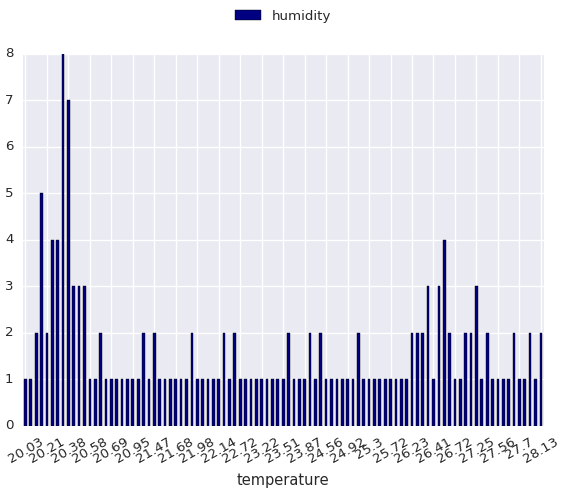

In [20]:
display(newdata)